<a href="https://colab.research.google.com/github/LuisChore/algorithmic_trading/blob/main/finance_analysis/rate_of_returns/02_portfolio_rate_of_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import numpy as  np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [5]:
def portfolio_rate_of_return(tickets,weights,start_year,show_graphic = True):
  data = pd.DataFrame()
  for t in tickets:
    data[t] = wb.DataReader(t,'yahoo',start = start_year)['Adj Close']

  #debug-review the same number of data for each security
  '''
  data.info()
  '''
  #normalization (for plotting)
  data = (data/data.iloc[0]*100)

  #plot
  if show_graphic:
    data.plot(figsize=(12,8))
    plt.show()

  #daily simple returns
  simple_returns = (data / data.shift(1)) - 1

  #average annual simple return
  annual_returns = simple_returns.mean()*250

  return np.dot(annual_returns,weights)

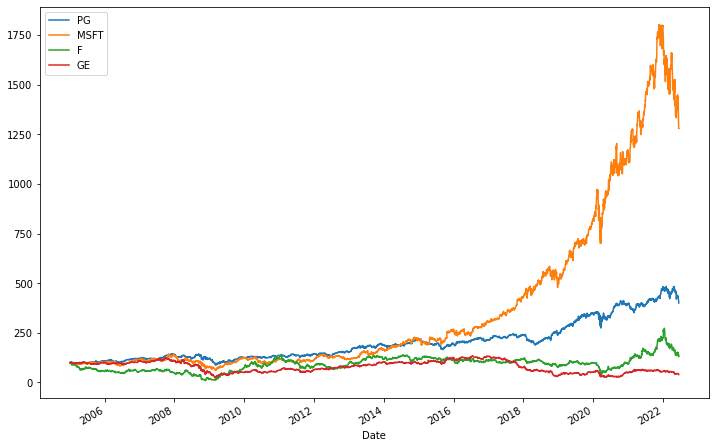

Portfolio Rate of Return: 10.507%


In [6]:
tickets = ['PG','MSFT','F','GE']
weights = [0.30,0.30,0.20,0.20]
start_year = 2005

rate_of_return = portfolio_rate_of_return(tickets,weights,start_year)
print("Portfolio Rate of Return: " + str(round(rate_of_return,5)*100) + "%")